# Sentiment Analyis Dataset

In [1]:
!pip install datasets

In [2]:
import pandas as pd

In [3]:
from datasets import load_dataset
ds = load_dataset("NebulaByte/E-Commerce_Customer_Support_Conversations")

In [4]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation'],
        num_rows: 1000
    })
})


In [5]:
dataset = ds['train'].to_pandas()

# Display the first few rows of the DataFrame
dataset.head(5)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   1000 non-null   object
 1   issue_category               1000 non-null   object
 2   issue_sub_category           1000 non-null   object
 3   issue_category_sub_category  1000 non-null   object
 4   customer_sentiment           1000 non-null   object
 5   product_category             1000 non-null   object
 6   product_sub_category         1000 non-null   object
 7   issue_complexity             1000 non-null   object
 8   agent_experience_level       1000 non-null   object
 9   agent_experience_level_desc  1000 non-null   object
 10  conversation                 1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [7]:
dataset['issue_area'].value_counts()

issue_area
Cancellations and returns    286
Order                        270
Login and Account            151
Shopping                     116
Warranty                     105
Shipping                      72
Name: count, dtype: int64

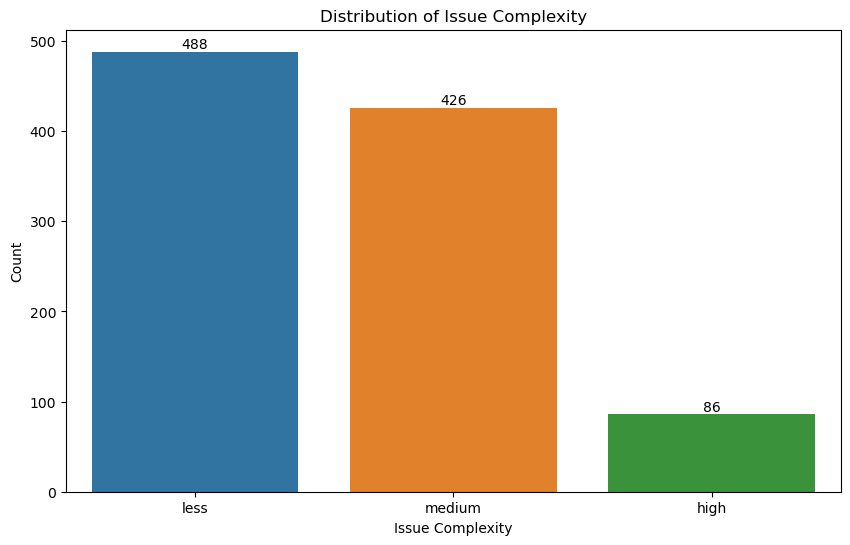

In [8]:
# prompt: a bar graph for 'issue_complexity' and specify the value of the attribute at the top of the bar.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for 'issue_complexity'
issue_complexity_counts = dataset['issue_complexity'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=issue_complexity_counts.index, y=issue_complexity_counts.values)
plt.xlabel('Issue Complexity')
plt.ylabel('Count')
plt.title('Distribution of Issue Complexity')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [9]:
dataset['agent_experience_level'].value_counts()

agent_experience_level
junior           507
experienced      348
inexperienced    145
Name: count, dtype: int64

In [10]:
dataset['agent_experience_level_desc'].value_counts()

agent_experience_level_desc
handles customer inquiries independently, possess solid troubleshooting skills, and seek guidance from more experienced team members when needed.                                                                                             507
confidently handles complex customer issues, excel in de-escalation, and possess the ability to empathize with customers, providing them with effective solutions and support.                                                                348
may struggle with ambiguous queries, rely on clarification from customers or guidance from senior team members, find it difficult to de-escalate tense situations, and may rely on predefined steps or escalate to supervisors for support    145
Name: count, dtype: int64

In [11]:
dataset['customer_sentiment'].value_counts()

customer_sentiment
neutral       552
negative      316
frustrated    105
positive       27
Name: count, dtype: int64

In [12]:
# 'customer_sentiment' vs each level of 'agent_experience_level'

In [13]:
dataset.loc[dataset['agent_experience_level'].eq("inexperienced"), 'customer_sentiment'].value_counts()

customer_sentiment
neutral       95
negative      36
frustrated    12
positive       2
Name: count, dtype: int64

In [14]:
dataset.loc[dataset['agent_experience_level'].eq("junior"), 'customer_sentiment'].value_counts()

customer_sentiment
neutral       266
negative      169
frustrated     54
positive       18
Name: count, dtype: int64

In [15]:
dataset.loc[dataset['agent_experience_level'].eq("experienced"), 'customer_sentiment'].value_counts()

customer_sentiment
neutral       191
negative      111
frustrated     39
positive        7
Name: count, dtype: int64

In [16]:
dataset.loc[dataset['agent_experience_level'].eq("inexperienced"), 'customer_sentiment'].value_counts()/dataset.loc[dataset['agent_experience_level'].eq("inexperienced"), 'customer_sentiment'].value_counts().sum()*100

customer_sentiment
neutral       65.517241
negative      24.827586
frustrated     8.275862
positive       1.379310
Name: count, dtype: float64

In [17]:
dataset.loc[dataset['agent_experience_level'].eq("junior"), 'customer_sentiment'].value_counts()/dataset.loc[dataset['agent_experience_level'].eq("junior"), 'customer_sentiment'].value_counts().sum()*100

customer_sentiment
neutral       52.465483
negative      33.333333
frustrated    10.650888
positive       3.550296
Name: count, dtype: float64

In [18]:
dataset.loc[dataset['agent_experience_level'].eq("experienced"), 'customer_sentiment'].value_counts()/dataset.loc[dataset['agent_experience_level'].eq("experienced"), 'customer_sentiment'].value_counts().sum()*100

customer_sentiment
neutral       54.885057
negative      31.896552
frustrated    11.206897
positive       2.011494
Name: count, dtype: float64